# Beginning agent-based modeling
Deer diffusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Create some animals, give them coordinates, and make them move using Brownian motion/diffusion (in other words, the motion is random):

<IPython.core.display.Javascript object>


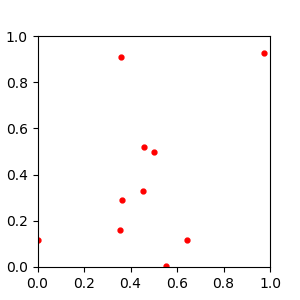

In [37]:
# magic spell to make the plot interactive:
%matplotlib notebook

n = 10
nsteps = 100
diffusion_speed = 0.1
x = np.ones(n)*0.5 # Start all the animals in the middle of the square by multiplying by 0.5
y = np.ones(n)*0.5

fig = plt.figure(figsize=(3,3));

for t in range(nsteps):
    x += np.random.randn(n)*diffusion_speed
    y += np.random.randn(n)*diffusion_speed
    
    for i in range(n):
        if x[i] < 0: x[i] = 0
        if y[i] < 0: y[i] = 0
        if x[i] > 1: x[i] = 1
        if y[i] > 1: y[i] = 1
    
    # Figure:
    plt.cla()
    plt.plot(x,y, 'r.', markersize=7);
    plt.xlim(0,1);
    plt.ylim(0,1);
    fig.canvas.draw() # Main command to make them move
    #time.sleep(0.01)



In [49]:
# Better ways to limit values in a numpy vector (use numpy instead of a ForLoop):

x = np.array([1,2,3,-7,5,6])
print(x)
print('x<0:',x<0)
print('x[x<0]:',x[x<0])
print(x[x<3])

# Only set values for those elements where the condition is true (BOOLEAN INDEXING):
x[x<0] = 0
print(x) # We replaced -7 with 0

# Another option:
y = np.array([1,2,3,-7,5,6])
np.max(y,0) # calculates the maximum of all elements
y = np.maximum(y,0) # applies maximum to each element

# Another option:
a = np.array([1,2,3,-7,5,6])
a = np.where(a>0, a, 0)
print(a)

[ 1  2  3 -7  5  6]
x<0: [False False False  True False False]
x[x<0]: [-7]
[ 1  2 -7]
[1 2 3 0 5 6]
[1 2 3 0 5 6]


GET RID OF FOR LOOP:

<IPython.core.display.Javascript object>


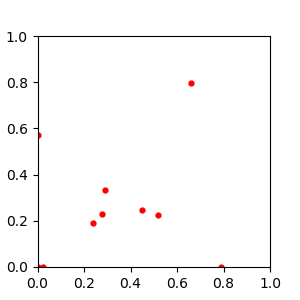

In [52]:
# magic spell to make the plot interactive:
%matplotlib notebook

n = 10
nsteps = 100
diffusion_speed = 0.1
x = np.ones(n)*0.5 # Start all the animals in the middle of the square by multiplying by 0.5
y = np.ones(n)*0.5

fig = plt.figure(figsize=(3,3));

for t in range(nsteps):
    x += np.random.randn(n)*diffusion_speed
    y += np.random.randn(n)*diffusion_speed
    
    # Create boundaries that animals cannot cross:
    x = np.where(x>0, x, 0)
    x = np.where(x<1, x, 0)
    y = np.where(y>0, y, 0)
    y = np.where(y<1, y, 0)
    #x[x<0] = 0
    #x[x>1] = 0
    #y[y<0] = 0
    #y[y>1] = 0
    
    # Figure:
    plt.cla()
    plt.plot(x,y, 'r.', markersize=7);
    plt.xlim(0,1);
    plt.ylim(0,1);
    fig.canvas.draw() # Main command to make them move
    #time.sleep(0.01)



### Homework

* Go from diffusion as a method of moving to dedicated speed (each one has a vector, and at each step add the vector to previous position. Numerical integration, get the code from the throwing stones lab).
* Figure out how to make the speed reverse so that they don't get stuck when they hit the walls